In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data', header=None)

In [3]:
data.columns=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion',
              'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mithoses','Class']

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mithoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mithoses                       0
Class                          0
dtype: int64

In [6]:
# Removing id column from df
data = data.drop('Sample code number', axis=1)

In [7]:
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mithoses                       0
Class                          0
dtype: int64

In [8]:
data = data.replace("?", np.nan)
data = data.dropna()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16056\730180483.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

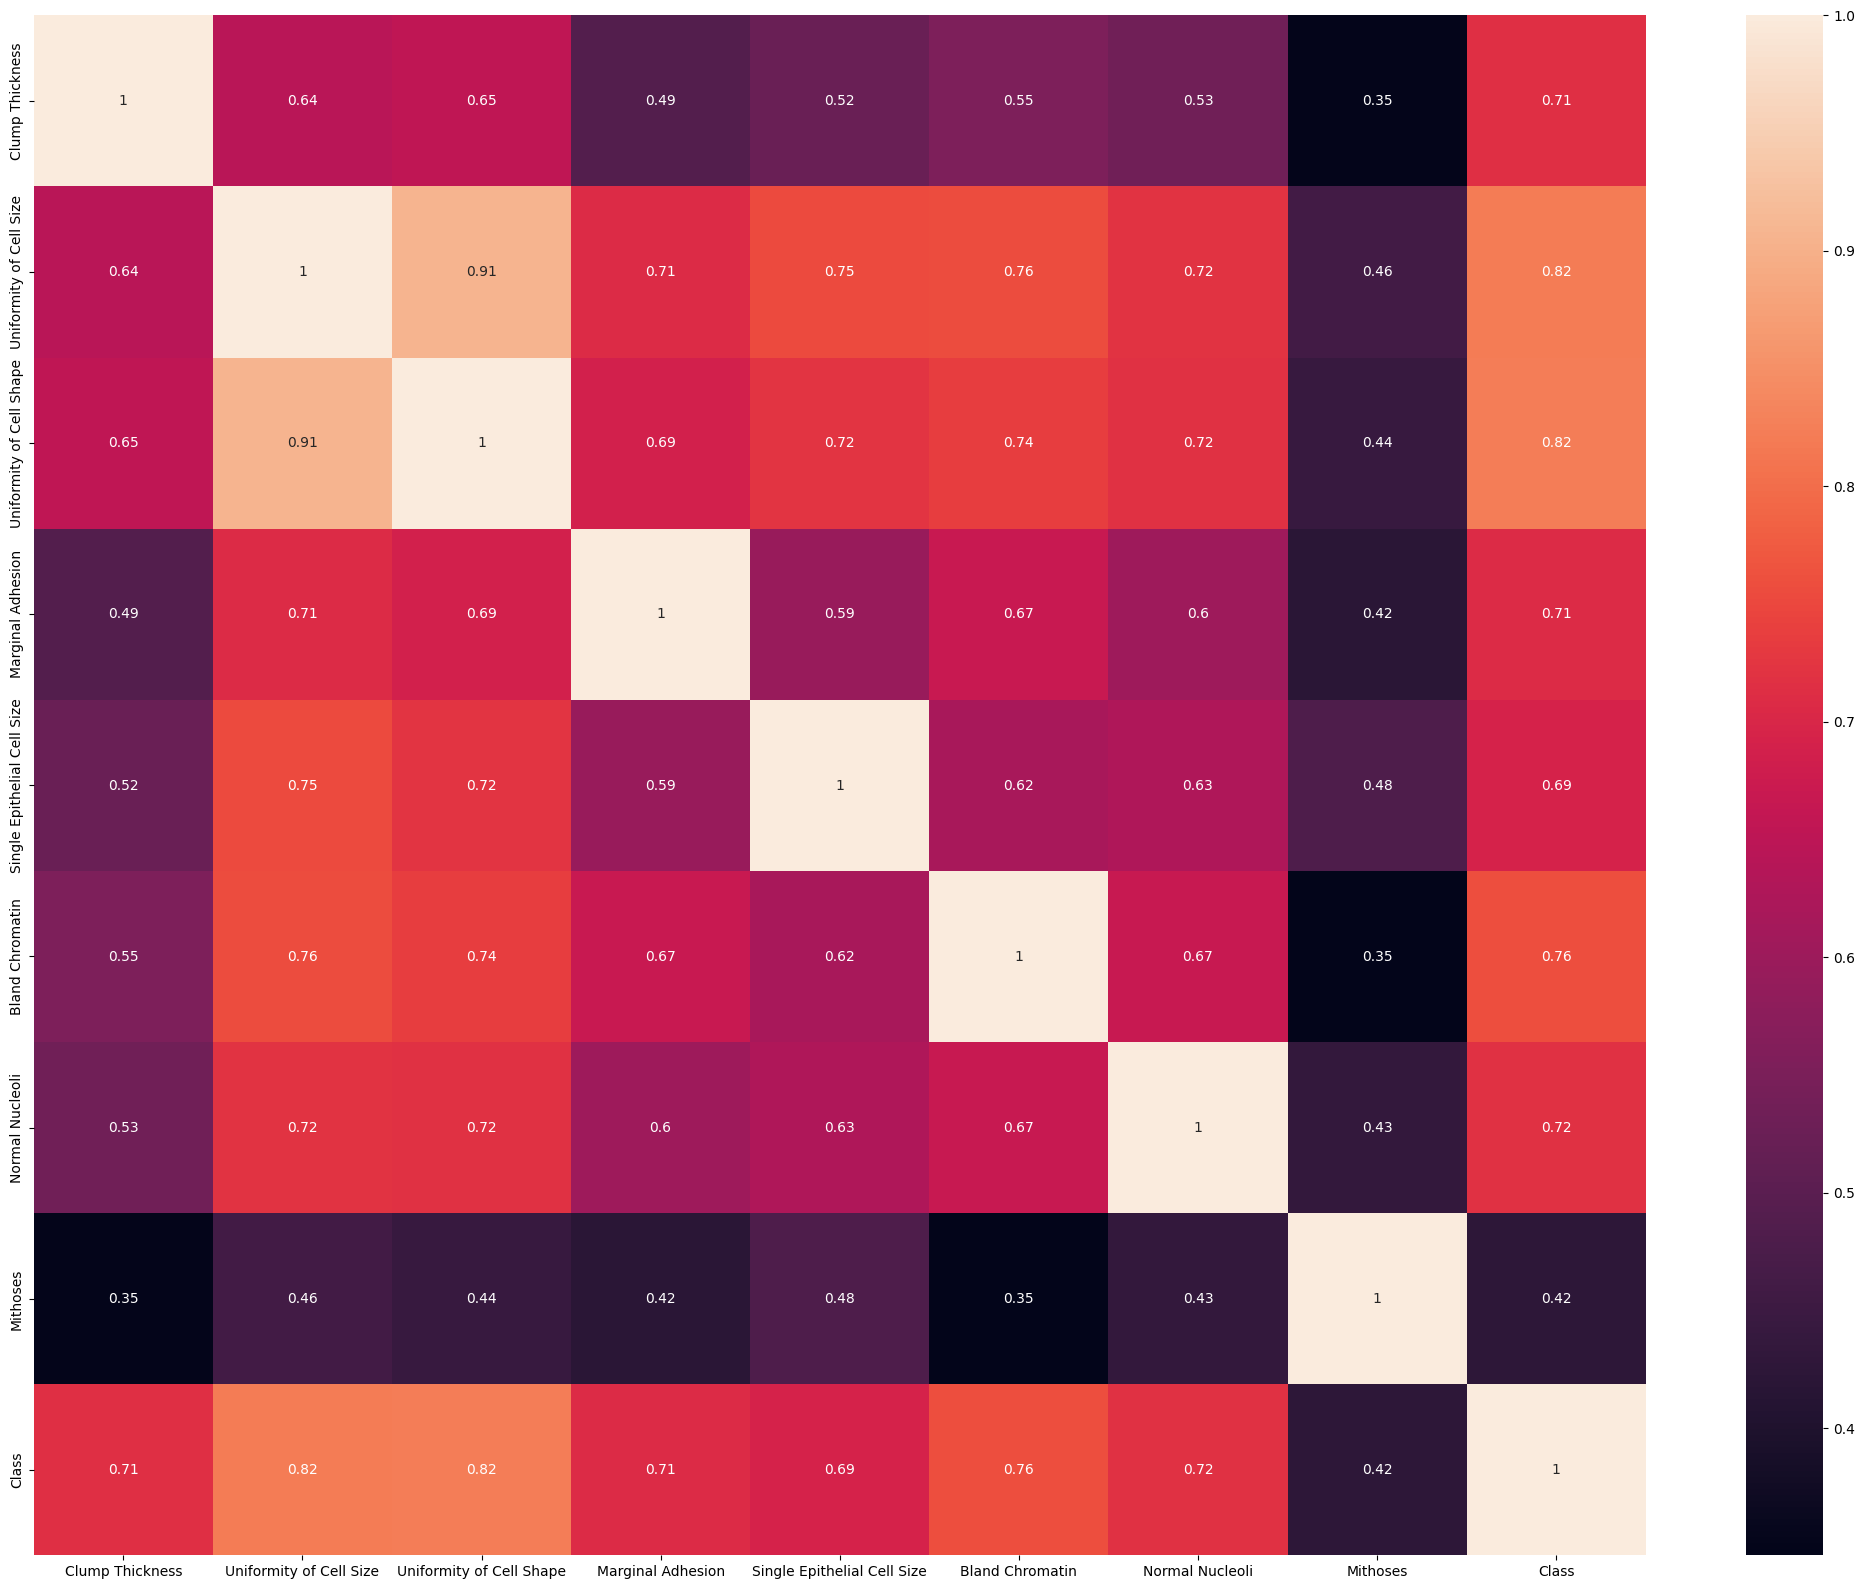

In [9]:
plt.figure(figsize=(26,20))
sns.heatmap(data.corr(), annot=True)

## Model building

In [10]:
X = data.drop('Class',axis=1)
y = data['Class']

In [11]:
norm=MinMaxScaler()
X=norm.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

In [14]:
# Cross-validation folds
kfold = 10
# Using cross-validation to calculate the mean accuracy for each algorithm
lr = cross_val_score(lr, X_train, y_train, cv=kfold)
dtc = cross_val_score(dt, X_train, y_train, cv=kfold)
rfc = cross_val_score(rf, X_train, y_train, cv=kfold)

In [15]:
# Print the mean accuracy for each algorithm
print("Logestic Regression Mean Accuracy:", dtc.mean())
print("Decision Trees Mean Accuracy:", dtc.mean())
print("Random Forest Mean Accuracy:", rfc.mean())

Logestic Regression Mean Accuracy: 0.9432659932659933
Decision Trees Mean Accuracy: 0.9432659932659933
Random Forest Mean Accuracy: 0.9652188552188553


Here, Random forest have highest accuracy as we can see after cross validation, So we will use Random forest and do hyperparameter tuning

In [16]:
param = {'n_estimators': [50, 100, 150, 200],'max_depth': [None, 3, 5, 7, 10],
              'min_samples_split': [2, 4, 5, 6, 10],'min_samples_leaf': [1, 2, 4]}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 5, 6, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [17]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9688407005838198


In [18]:
# Train the Random Forest classifier with the best hyperparameters on the training set
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [19]:
y_pred = rf_best.predict(X_test)

In [20]:
pred_acc = accuracy_score(y_test,y_pred)
print('Testing Accuracy:', pred_acc)

Testing Accuracy: 0.9635036496350365


In [21]:
print('classification_report after grid : \n',classification_report(y_test,y_pred))

print('confusion_matrix after grid : \n',confusion_matrix(y_test,y_pred))

classification_report after grid : 
               precision    recall  f1-score   support

           2       0.96      0.97      0.97        79
           4       0.96      0.95      0.96        58

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

confusion_matrix after grid : 
 [[77  2]
 [ 3 55]]


After hypermeter tuning we got around 95% accuracy of Random Forest Classifier on unseen dataset